# Simple Python solver for the Lane-Emden equation 

The Lane-Emden equation is a second-order ordinary differential equation that is a useful approximation for self-gravitating spheres of plasma such as stars. It can be expressed as follows:

$\frac{1}{z^2}\frac{d}{dz}\left[ z^2 \frac{dW}{dz} \right] + W^n = 0$, 

where $W$ is a dimensionless quantity, $z$ is the dimensionless radius and $n$ is the polytropic index. 
Exact analytic solutions exist only for $n = 0$, $n = 1$ or $n = 5$. With the code provided in ```lane_emden.py``` you can numerically solve the Lane-Emden equation for many values of polytropic indexes. 

The solver break the LE equation into two first-order ODEs:

$\frac{df}{dz} = -z^2W^n$,
$\frac{dW}{dz} = z^{-2}f$,

which are then integrated through the method ```integrate_LE```. 

In [1]:
from lane_emden import *
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.rcParams['font.size'] = 12

Now lets solve the LE equation for some values of $n$ and find their roots:

n = 0, roots = [2.45]
n = 1, roots = [3.14, 6.28, 9.42]
n = 2, roots = [4.35]
n = 4, roots = []


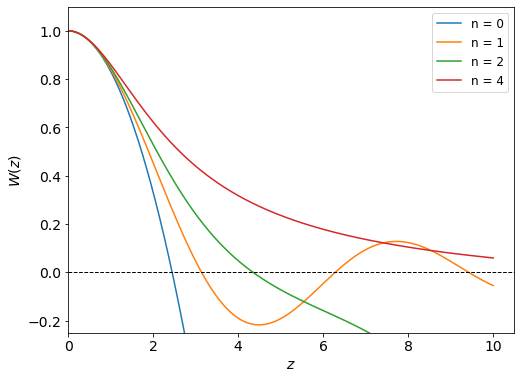

In [2]:
n_L = [0,1,2,4]
for n in n_L:
    x,y = integrate_LE(n)
    rs = roots_LE(x,y)
    rs = [round(r,2) for r in rs]
    print('n = {0}, roots = {1}'.format(n,rs))
    
    plt.plot(x,y,label='n = {0}'.format(n))

plt.axhline(0,ls='--',color='black',lw=1)
plt.ylim(-0.25,1.1);plt.xlim(0)
plt.xlabel(r'$z$');plt.ylabel(r'$W(z)$')
plt.legend()
plt.show()

The integration method has 3 integration parameters, the number of steps ```N```, the width of steps ```dz``` (fixed) and the initial value for ```z_0```, by default this values are ```N = 10000```, ```dz = 0.001``` and ```z_0 = 0.001```. In the example above we are using the default values for these parameters.

*** 

Now lets compare the solutions of the solver with analytic solutions for $n = 0$, $n = 1$ or $n = 5$.

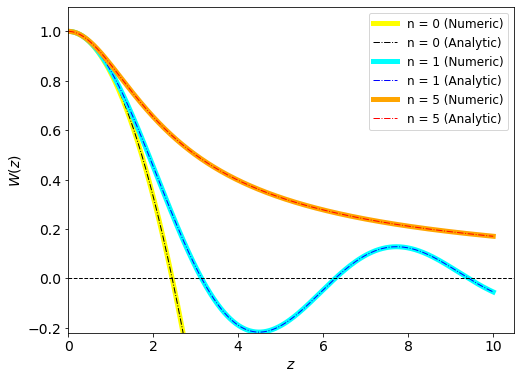

In [3]:
n_L = [0,1,5]
c1 = ['yellow','cyan','orange']
c2 = ['black','blue','red']
for i,n in enumerate(n_L):
    x,y = integrate_LE(n)
    y_a = analytic_LE(np.array(x),n)    
    plt.plot(x,y,c=c1[i],lw=5,label='n = {0} (Numeric)'.format(n))
    plt.plot(x,y_a,c=c2[i],ls='-.',lw=1,label='n = {0} (Analytic)'.format(n))

plt.axhline(0,ls='--',color='black',lw=1)
plt.ylim(-0.22,1.1);plt.xlim(0)
plt.xlabel(r'$z$');plt.ylabel(r'$W(z)$')
plt.legend()
plt.savefig('analytic.png',dpi=100)
plt.show()

The first roots in the analytic solutions only exist for $n=0$ and $n=1$, which are $\sqrt{6} \approx 2.45$ and $\pi \approx 3.14$, respectively, lets use the ```roots_LE``` method to find the roots numerically:

In [4]:
n_L = [0,1,5]
for n in n_L:
    x,y = integrate_LE(n)
    rs = roots_LE(x,y)
    rs = [round(r,2) for r in rs]
    print('n = {0}, roots = {1}'.format(n,rs))
    

n = 0, roots = [2.45]
n = 1, roots = [3.14, 6.28, 9.42]
n = 5, roots = []


Well done!
***

Lets see some more examples of cases which do not have exact analytic solutions:

/home/rodrigoff96/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


n = 1.5, roots = [3.65, 8.14]
n = 3, roots = [6.9]


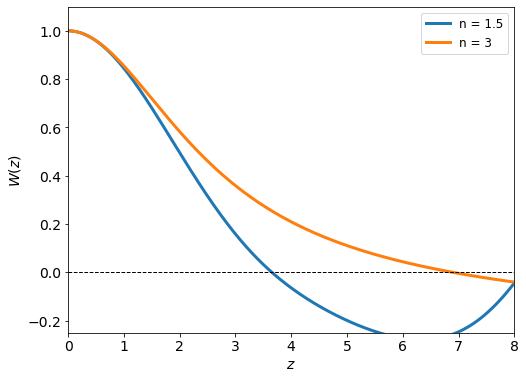

In [5]:
n_L = [1.5,3]
for n in n_L:
    x,y = integrate_LE(n)
    plt.plot(x,y,lw=3,label='n = {0}'.format(n))
    rs = roots_LE(x,y)
    rs = [round(r,2) for r in rs]
    print('n = {0}, roots = {1}'.format(n,rs))

plt.axhline(0,ls='--',color='black',lw=1)
plt.ylim(-0.25,1.1);plt.xlim(0,8)
plt.xlabel(r'$z$');plt.ylabel(r'$W(z)$')
plt.legend()
plt.savefig('numerical.png',dpi=100)
plt.show()

Now we can compute the density and pressure:

/home/rodrigoff96/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


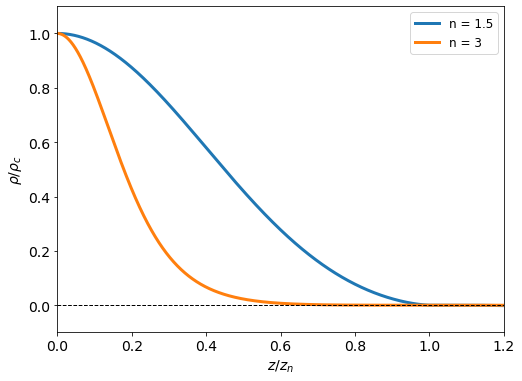

In [8]:
n_L = [1.5,3]
z_L = [3.65,6.9]
for i,n in enumerate(n_L):
    x,y = integrate_LE(n)
    plt.plot(np.array(x)/z_L[i],np.array(y)**n,lw=3,label='n = {0}'.format(n))

plt.axhline(0,ls='--',color='black',lw=1)
plt.ylim(-0.1,1.1);plt.xlim(0,1.2)
plt.xlabel(r'$z/z_n$');plt.ylabel(r'$\rho$/$\rho_{c}$')
plt.legend()
plt.savefig('density.png')
plt.show()

/home/rodrigoff96/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


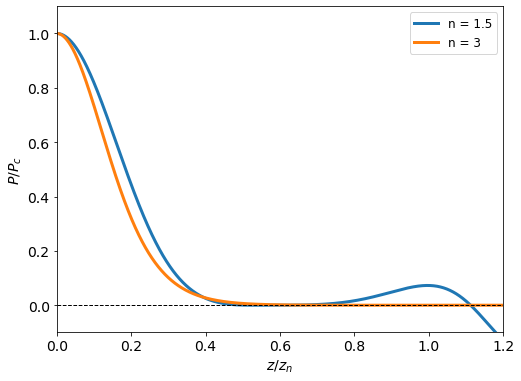

In [9]:
n_L = [1.5,3]
z_L = [3.65,6.9]

for n in n_L:
    x,y = integrate_LE(n)
    plt.plot(np.array(x)/z_L[i],np.array(y)**(n+1),lw=3,label='n = {0}'.format(n))

plt.axhline(0,ls='--',color='black',lw=1)
plt.ylim(-0.1,1.1);plt.xlim(0,1.2)
plt.xlabel(r'$z/z_n$');plt.ylabel(r'$P$/$P_{c}$')
plt.legend()
plt.savefig('pressure.png')
plt.show()